# Regression Models

Here I will build a regression model to test on cryptocurrency data, ADAUSDT, to predict prices.   
I will use the 4h timeframe and the following features (based on findings in the feature_selection file):  

['open', 'high', 'low', 'AVGPRICE', 'MEDPRICE', 'TYPPRICE', 'WCLPRICE'] 

In [9]:
import pandas as pd
import talib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("../Data/ADA/ADA_USDT_4h.csv")
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

df['AVGPRICE'] = talib.AVGPRICE(df['open'], df['high'], df['low'], df['close'])
df['MEDPRICE'] = talib.MEDPRICE(df['high'], df['low'])
df['TYPPRICE'] = talib.TYPPRICE(df['high'], df['low'], df['close'])
df['WCLPRICE'] = talib.WCLPRICE(df['high'], df['low'], df['close'])

df.head(5)

,open,high,low,close,volume,AVGPRICE,MEDPRICE,TYPPRICE,WCLPRICE
datetime,,,,,,,,,
2021-10-22 00:00:00,2.141,2.194,2.133,2.185,10918.3,2.16325,2.1635,2.170667,2.17425
2021-10-22 04:00:00,2.185,2.202,2.185,2.198,26091.8,2.19250,2.1935,2.195000,2.19575
2021-10-22 08:00:00,2.198,2.208,2.182,2.192,24092.3,2.19500,2.1950,2.194000,2.19350
2021-10-22 12:00:00,2.192,2.201,2.147,2.151,30423.4,2.17275,2.1740,2.166333,2.16250
2021-10-22 16:00:00,2.151,2.183,2.142,2.165,17709.4,2.16025,2.1625,2.163333,2.16375


### Linear Regression

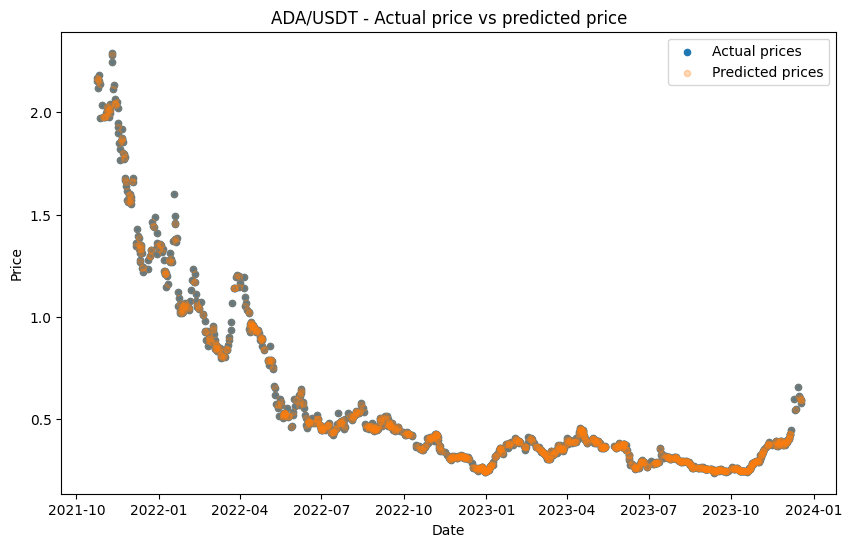

In [11]:
X = df.drop(columns=["close"])
y = df['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test.values, label="Actual prices", s=20)
plt.scatter(y_test.index, predictions, label="Predicted prices", alpha=0.3, s=20)
plt.title("ADA/USDT - Actual price vs predicted price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

It looks like the predictions are quite accurate. We'll see what the evaluation scores say.

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R² Score: {r2}')

Mean Squared Error (MSE): 1.2144629427177782e-20
Mean Absolute Error (MAE): 7.434682276051225e-11
Root Mean Squared Error (RMSE): 1.1020267431953629e-10
Mean Absolute Percentage Error (MAPE): 1.5286045983595788e-08
R² Score: 1.0


These results lead me to believe the model is overfitted.  
r^2 score of 1.0 means that it's pretty much a perfect fit, which is unlikely.  
The error values are also extremely low, which is also unlikely.

This model was trained on data from 2021-10-22 to 2023-12-18. I will now test the model on more recent data, from 2023-12-19 to 2024-04-01.

In [13]:
# I will check to make sure there's no overlap between the datasets
df.tail(5)

,open,high,low,close,volume,AVGPRICE,MEDPRICE,TYPPRICE,WCLPRICE
datetime,,,,,,,,,
2023-12-17 08:00:00,0.5939,0.6036,0.5918,0.6011,1282360.45,0.597600,0.59770,0.598833,0.599400
2023-12-17 12:00:00,0.6011,0.6021,0.5852,0.5931,3347908.84,0.595375,0.59365,0.593467,0.593375
2023-12-17 16:00:00,0.5931,0.6108,0.5879,0.5941,2846658.59,0.596475,0.59935,0.597600,0.596725
2023-12-17 20:00:00,0.5941,0.5984,0.5771,0.5805,2449740.24,0.587525,0.58775,0.585333,0.584125
2023-12-18 00:00:00,0.5805,0.5812,0.5799,0.5812,7422.13,0.580700,0.58055,0.580767,0.580875


In [14]:
df_recent = pd.read_csv("../Data/ADA/ADA_USDT_recent.csv")
df_recent['datetime'] = pd.to_datetime(df_recent['datetime'])
df_recent.set_index('datetime', inplace=True)

df_recent['AVGPRICE'] = talib.AVGPRICE(df_recent['open'], df_recent['high'], df_recent['low'], df_recent['close'])
df_recent['MEDPRICE'] = talib.MEDPRICE(df_recent['high'], df_recent['low'])
df_recent['TYPPRICE'] = talib.TYPPRICE(df_recent['high'], df_recent['low'], df_recent['close'])
df_recent['WCLPRICE'] = talib.WCLPRICE(df_recent['high'], df_recent['low'], df_recent['close'])

df_recent.head(5)

,open,high,low,close,volume,AVGPRICE,MEDPRICE,TYPPRICE,WCLPRICE
datetime,,,,,,,,,
2023-12-19 00:00:00,0.6020,0.6165,0.5964,0.6103,2793426.89,0.606300,0.60645,0.607733,0.608375
2023-12-19 04:00:00,0.6103,0.6173,0.6056,0.6083,2556222.31,0.610375,0.61145,0.610400,0.609875
2023-12-19 08:00:00,0.6083,0.6095,0.5932,0.5939,2752995.52,0.601225,0.60135,0.598867,0.597625
2023-12-19 12:00:00,0.5939,0.5976,0.5764,0.5814,2173155.18,0.587325,0.58700,0.585133,0.584200
2023-12-19 16:00:00,0.5814,0.5850,0.5662,0.5790,1927977.29,0.577900,0.57560,0.576733,0.577300


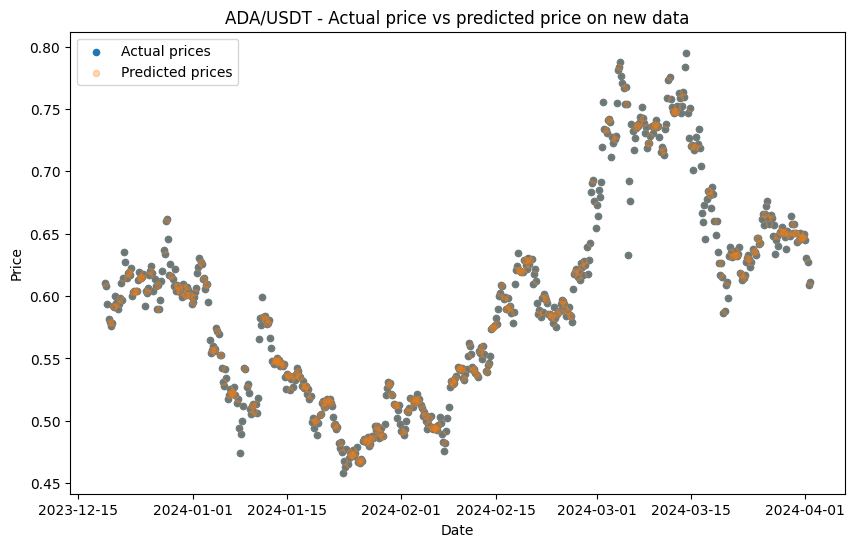

In [15]:
X_recent = df_recent.drop(columns=["close"])

predictions_recent = model.predict(X_recent)

plt.figure(figsize=(10, 6))
plt.scatter(df_recent.index, df_recent['close'], label="Actual prices", s=20)
plt.scatter(df_recent.index, predictions_recent, label="Predicted prices", alpha=0.3, s=20)
plt.title("ADA/USDT - Actual price vs predicted price on new data")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

This looks very promising actually. Perhaps the model isn't as overfitted as I'd thought.

In [16]:
mse_recent = mean_squared_error(df_recent['close'], predictions_recent)
mae_recent = mean_absolute_error(df_recent['close'], predictions_recent)
rmse_recent = np.sqrt(mse_recent)
mape_recent = np.mean(np.abs((df_recent['close'] - predictions_recent) / df_recent['close'])) * 100
r2_recent = r2_score(df_recent['close'], predictions_recent)

print(f'Mean Squared Error (MSE) on Recent Data: {mse_recent}')
print(f'Mean Absolute Error (MAE) on Recent Data: {mae_recent}')
print(f'Root Mean Squared Error (RMSE) on Recent Data: {rmse_recent}')
print(f'Mean Absolute Percentage Error (MAPE) on Recent Data: {mape_recent}')
print(f'R² Score on Recent Data: {r2_recent}')

Mean Squared Error (MSE) on Recent Data: 1.575516738056605e-19
Mean Absolute Error (MAE) on Recent Data: 2.4687682546560084e-10
Root Mean Squared Error (RMSE) on Recent Data: 3.969277941964514e-10
Mean Absolute Percentage Error (MAPE) on Recent Data: 3.9828707325204094e-08
R² Score on Recent Data: 1.0


Once again the R^2 is 1.0, and the error values, while slightly worse than on the original test data, is still extremely low.  

To further test this model, I will try it on another currency.  
The price movements are of course different for each currency, so the model is unlikely to perform as well on another.  
Still, we shall see. Perhaps this model works well in general, or only on ADA.

I will test it on ETH (ETH/USDT). This dataset is from 2022-01-01 to 2023-12-17.

In [17]:
df = pd.read_csv("../Data/Other-Cryptocurrencies/ETH_USDT.csv")
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

df['AVGPRICE'] = talib.AVGPRICE(df['open'], df['high'], df['low'], df['close'])
df['MEDPRICE'] = talib.MEDPRICE(df['high'], df['low'])
df['TYPPRICE'] = talib.TYPPRICE(df['high'], df['low'], df['close'])
df['WCLPRICE'] = talib.WCLPRICE(df['high'], df['low'], df['close'])

df.head()

,open,high,low,close,volume,AVGPRICE,MEDPRICE,TYPPRICE,WCLPRICE
datetime,,,,,,,,,
2023-01-01 00:00:00,1196.55,1196.96,1191.89,1194.07,3408.20241,1194.8675,1194.425,1194.306667,1194.2475
2023-01-01 04:00:00,1194.07,1195.80,1190.96,1194.99,2433.05371,1193.9550,1193.380,1193.916667,1194.1850
2023-01-01 08:00:00,1194.99,1197.72,1193.87,1196.48,1716.40170,1195.7650,1195.795,1196.023333,1196.1375
2023-01-01 12:00:00,1196.48,1198.65,1193.64,1196.67,2681.79401,1196.3600,1196.145,1196.320000,1196.4075
2023-01-01 16:00:00,1196.67,1204.30,1195.78,1201.63,5201.76276,1199.5950,1200.040,1200.570000,1200.8350


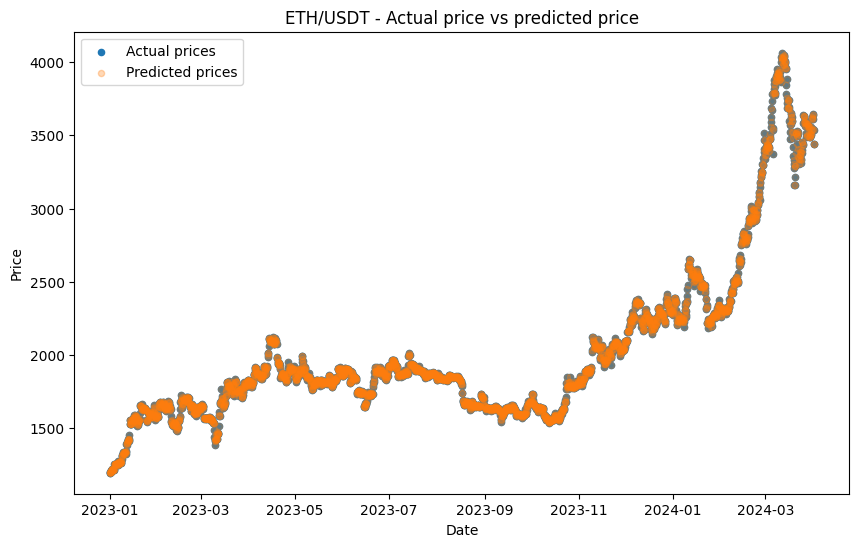

In [18]:
X = df.drop(columns=["close"])

predictions = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['close'], label="Actual prices", s=20)
plt.scatter(df.index, predictions, label="Predicted prices", alpha=0.3, s=20)
plt.title("ETH/USDT - Actual price vs predicted price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

Again the model seem to perform exceptionally well. We'll see about the evaluation metrics.

In [19]:
mse = mean_squared_error(df["close"], predictions)
mae = mean_absolute_error(df["close"], predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((df["close"] - predictions) / df["close"])) * 100
r2 = r2_score(df["close"], predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R² Score: {r2}')

Mean Squared Error (MSE): 2.744340196702787e-14
Mean Absolute Error (MAE): 1.5701994016126264e-07
Root Mean Squared Error (RMSE): 1.656605021332118e-07
Mean Absolute Percentage Error (MAPE): 7.818618508270467e-09
R² Score: 1.0


It is now evident that the model performs exceptionally well, at least on ETH and ADA.  
However, this is on a 4h timeframe and it's possible that ETH and ADA have had similar price movements.  
Also, this model only tests the next period/candlestick, so it's only useful in short-term.  
It's also possible that the price movements between candles are simply very small, while the bigger price movements are seen over longer periods of time.  

I will test it on more currencies. BTC, DOGE, DOT, LINK, SOL, XRP. For these I will only print the evaluation scores and not the plots.

In [31]:
# Bitcoin (BTC)
df = pd.read_csv("../Data/Other-Cryptocurrencies/BTC_USDT.csv")
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

df['AVGPRICE'] = talib.AVGPRICE(df['open'], df['high'], df['low'], df['close'])
df['MEDPRICE'] = talib.MEDPRICE(df['high'], df['low'])
df['TYPPRICE'] = talib.TYPPRICE(df['high'], df['low'], df['close'])
df['WCLPRICE'] = talib.WCLPRICE(df['high'], df['low'], df['close'])

X = df.drop(columns=["close"])

predictions = model.predict(X)

mse = mean_squared_error(df["close"], predictions)
mae = mean_absolute_error(df["close"], predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((df["close"] - predictions) / df["close"])) * 100
r2 = r2_score(df["close"], predictions)

print("Bitcoin (BTC):")
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R² Score: {r2}')
print("\n")

# Dogecoin (DOGE)
df = pd.read_csv("../Data/Other-Cryptocurrencies/DOGE_USDT.csv")
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

df['AVGPRICE'] = talib.AVGPRICE(df['open'], df['high'], df['low'], df['close'])
df['MEDPRICE'] = talib.MEDPRICE(df['high'], df['low'])
df['TYPPRICE'] = talib.TYPPRICE(df['high'], df['low'], df['close'])
df['WCLPRICE'] = talib.WCLPRICE(df['high'], df['low'], df['close'])

X = df.drop(columns=["close"])

predictions = model.predict(X)

mse = mean_squared_error(df["close"], predictions)
mae = mean_absolute_error(df["close"], predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((df["close"] - predictions) / df["close"])) * 100
r2 = r2_score(df["close"], predictions)

print("Dogecoin (DOGE):")
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R² Score: {r2}')
print("\n")

# Polkadot (DOT)
df = pd.read_csv("../Data/Other-Cryptocurrencies/DOT_USDT.csv")
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

df['AVGPRICE'] = talib.AVGPRICE(df['open'], df['high'], df['low'], df['close'])
df['MEDPRICE'] = talib.MEDPRICE(df['high'], df['low'])
df['TYPPRICE'] = talib.TYPPRICE(df['high'], df['low'], df['close'])
df['WCLPRICE'] = talib.WCLPRICE(df['high'], df['low'], df['close'])

X = df.drop(columns=["close"])

predictions = model.predict(X)

mse = mean_squared_error(df["close"], predictions)
mae = mean_absolute_error(df["close"], predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((df["close"] - predictions) / df["close"])) * 100
r2 = r2_score(df["close"], predictions)

print("Polkadot (DOT):")
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R² Score: {r2}')
print("\n")

# Chainlink (LINK)
df = pd.read_csv("../Data/Other-Cryptocurrencies/LINK_USDT.csv")
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

df['AVGPRICE'] = talib.AVGPRICE(df['open'], df['high'], df['low'], df['close'])
df['MEDPRICE'] = talib.MEDPRICE(df['high'], df['low'])
df['TYPPRICE'] = talib.TYPPRICE(df['high'], df['low'], df['close'])
df['WCLPRICE'] = talib.WCLPRICE(df['high'], df['low'], df['close'])

X = df.drop(columns=["close"])

predictions = model.predict(X)

mse = mean_squared_error(df["close"], predictions)
mae = mean_absolute_error(df["close"], predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((df["close"] - predictions) / df["close"])) * 100
r2 = r2_score(df["close"], predictions)

print("Chainlink (LINK):")
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R² Score: {r2}')
print("\n")

# Solana (SOL)
df = pd.read_csv("../Data/Other-Cryptocurrencies/SOL_USDT.csv")
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

df['AVGPRICE'] = talib.AVGPRICE(df['open'], df['high'], df['low'], df['close'])
df['MEDPRICE'] = talib.MEDPRICE(df['high'], df['low'])
df['TYPPRICE'] = talib.TYPPRICE(df['high'], df['low'], df['close'])
df['WCLPRICE'] = talib.WCLPRICE(df['high'], df['low'], df['close'])

X = df.drop(columns=["close"])

predictions = model.predict(X)

mse = mean_squared_error(df["close"], predictions)
mae = mean_absolute_error(df["close"], predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((df["close"] - predictions) / df["close"])) * 100
r2 = r2_score(df["close"], predictions)

print("Solana (SOL):")
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R² Score: {r2}')
print("\n")

# XRP
df = pd.read_csv("../Data/Other-Cryptocurrencies/XRP_USDT.csv")
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

df['AVGPRICE'] = talib.AVGPRICE(df['open'], df['high'], df['low'], df['close'])
df['MEDPRICE'] = talib.MEDPRICE(df['high'], df['low'])
df['TYPPRICE'] = talib.TYPPRICE(df['high'], df['low'], df['close'])
df['WCLPRICE'] = talib.WCLPRICE(df['high'], df['low'], df['close'])

X = df.drop(columns=["close"])

predictions = model.predict(X)

mse = mean_squared_error(df["close"], predictions)
mae = mean_absolute_error(df["close"], predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((df["close"] - predictions) / df["close"])) * 100
r2 = r2_score(df["close"], predictions)

print("XRP:")
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R² Score: {r2}')

# In hindsight I realize this could probably be done using a loop. I may return later to clean it up.

Bitcoin (BTC):
Mean Squared Error (MSE): 8.241574735472566e-12
Mean Absolute Error (MAE): 2.668361038609045e-06
Root Mean Squared Error (RMSE): 2.870814298325924e-06
Mean Absolute Percentage Error (MAPE): 7.949993093070823e-09
R² Score: 1.0


Dogecoin (DOGE):
Mean Squared Error (MSE): 9.59052581610944e-18
Mean Absolute Error (MAE): 1.5866478908823494e-09
Root Mean Squared Error (RMSE): 3.0968574097154423e-09
Mean Absolute Percentage Error (MAPE): 1.6637346535715724e-06
R² Score: 0.9999999999999861


Polkadot (DOT):
Mean Squared Error (MSE): 2.4606751177858243e-19
Mean Absolute Error (MAE): 4.637654414698063e-10
Root Mean Squared Error (RMSE): 4.96051924478257e-10
Mean Absolute Percentage Error (MAPE): 7.860526942529752e-09
R² Score: 1.0


Chainlink (LINK):
Mean Squared Error (MSE): 7.464646351172411e-19
Mean Absolute Error (MAE): 7.520674760321279e-10
Root Mean Squared Error (RMSE): 8.639818488355187e-10
Mean Absolute Percentage Error (MAPE): 7.586293669268685e-09
R² Score: 1.0


Solan

## Final results  

#### Cardano (ADA)  

**Test-data:**  

Mean Squared Error (MSE): 1.2144629427177782e-20  
Mean Absolute Error (MAE): 7.434682276051225e-11  
Root Mean Squared Error (RMSE): 1.1020267431953629e-10  
Mean Absolute Percentage Error (MAPE): 1.5286045983595788e-08  
R² Score: 1.0  

**Recent data:**  

Mean Squared Error (MSE) on Recent Data: 1.575516738056605e-19  
Mean Absolute Error (MAE) on Recent Data: 2.4687682546560084e-10  
Root Mean Squared Error (RMSE) on Recent Data: 3.969277941964514e-10  
Mean Absolute Percentage Error (MAPE) on Recent Data: 3.9828707325204094e-08  
R² Score on Recent Data: 1.0  

#### Ethereum (ETH):  
Mean Squared Error (MSE): 2.744340196702787e-14  
Mean Absolute Error (MAE): 1.5701994016126264e-07  
Root Mean Squared Error (RMSE): 1.656605021332118e-07  
Mean Absolute Percentage Error (MAPE): 7.818618508270467e-09  
R² Score: 1.0  

#### Bitcoin (BTC):  
Mean Squared Error (MSE): 8.241574735472566e-12  
Mean Absolute Error (MAE): 2.668361038609045e-06  
Root Mean Squared Error (RMSE): 2.870814298325924e-06  
Mean Absolute Percentage Error (MAPE): 7.949993093070823e-09  
R² Score: 1.0  

#### Dogecoin (DOGE):
Mean Squared Error (MSE): 9.59052581610944e-18  
Mean Absolute Error (MAE): 1.5866478908823494e-09  
Root Mean Squared Error (RMSE): 3.0968574097154423e-09  
Mean Absolute Percentage Error (MAPE): 1.6637346535715724e-06  
R² Score: 0.9999999999999861  

#### Polkadot (DOT):  
Mean Squared Error (MSE): 2.4606751177858243e-19  
Mean Absolute Error (MAE): 4.637654414698063e-10  
Root Mean Squared Error (RMSE): 4.96051924478257e-10  
Mean Absolute Percentage Error (MAPE): 7.860526942529752e-09  
R² Score: 1.0  

#### Chainlink (LINK):  
Mean Squared Error (MSE): 7.464646351172411e-19  
Mean Absolute Error (MAE): 7.520674760321279e-10  
Root Mean Squared Error (RMSE): 8.639818488355187e-10  
Mean Absolute Percentage Error (MAPE): 7.586293669268685e-09  
R² Score: 1.0  

#### Solana (SOL):  
Mean Squared Error (MSE): 2.35491056054915e-17  
Mean Absolute Error (MAE): 3.3168632797170937e-09  
Root Mean Squared Error (RMSE): 4.852742070777253e-09  
Mean Absolute Percentage Error (MAPE): 7.080873097353434e-09  
R² Score: 1.0  

#### XRP:  
Mean Squared Error (MSE): 1.9010390454390722e-18  
Mean Absolute Error (MAE): 7.000352636938847e-10  
Root Mean Squared Error (RMSE): 1.3787817250888816e-09  
Mean Absolute Percentage Error (MAPE): 1.2630110866433203e-07  
R² Score: 0.9999999999999998  

## Conclusion  

The model works exceptionally well on several currencies and different market conditions, on a 4h timeframe. All error values are extremely low and the R² score is at or near 1.0.  
In the future I may test it with paper trading to see how well it performs in real-time.